In [1]:
from qiskit import*
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *

from qiskit.providers.aer import QasmSimulator


In [2]:
qr = QuantumRegister(7) # quantum bit register
cr = ClassicalRegister(7) # classical bit register
circuit = QuantumCircuit(qr, cr)
# create a quantum circuit containing 5 qubits
# all qubits in superposition (50%:50% chance to be in |0> or |1>) and independent of each other
circuit.h(qr)
circuit.measure(qr, cr)
#circuit.draw(output='mpl', scale=1)

In [3]:
circuit.draw()

┌───┐┌─┐                  
q0_0: ┤ H ├┤M├──────────────────
      ├───┤└╥┘┌─┐               
q0_1: ┤ H ├─╫─┤M├───────────────
      ├───┤ ║ └╥┘┌─┐            
q0_2: ┤ H ├─╫──╫─┤M├────────────
      ├───┤ ║  ║ └╥┘┌─┐         
q0_3: ┤ H ├─╫──╫──╫─┤M├─────────
      ├───┤ ║  ║  ║ └╥┘┌─┐      
q0_4: ┤ H ├─╫──╫──╫──╫─┤M├──────
      ├───┤ ║  ║  ║  ║ └╥┘┌─┐   
q0_5: ┤ H ├─╫──╫──╫──╫──╫─┤M├───
      ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐
q0_6: ┤ H ├─╫──╫──╫──╫──╫──╫─┤M├
      └───┘ ║  ║  ║  ║  ║  ║ └╥┘
c0: 7/══════╩══╩══╩══╩══╩══╩══╩═
            0  1  2  3  4  5  6

In [4]:
from qiskit.tools.visualization import plot_histogram
# let's execute our Quantum Circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=1024, memory=True).result()
# get all experiments (number of shots)
raw_data = result.get_memory()
print(raw_data)

['1010101', '1010101', '1010111', '1100110', '1100011', '1111101', '1000111', '0100110', '0011001', '1010011', '1000001', '1010111', '1110010', '0001001', '1010011', '0011111', '1100100', '0001001', '1010100', '0100001', '1101000', '0111001', '0000110', '1100110', '1010110', '0110101', '0001111', '0000001', '1100000', '0010011', '1111000', '0010101', '0111000', '0111101', '1100001', '0111001', '1110010', '1001000', '1100000', '0110000', '0101100', '0110011', '1110110', '1101101', '1000111', '1010001', '0100110', '0110111', '0000000', '0010101', '0000101', '0111001', '1000101', '0010000', '0100000', '0101101', '1100001', '1100111', '0100010', '1001110', '1010011', '0010001', '1010011', '1001010', '0100100', '0001110', '0001100', '1100100', '1100000', '1110011', '1110111', '0101110', '0111111', '0001001', '0010101', '0011110', '0100011', '0011101', '0001011', '0110101', '1011100', '1111011', '0110110', '1011101', '0000001', '1111111', '0100011', '0000101', '1010111', '0101100', '1010100'

In [5]:
counts = result.get_counts()
print(counts)

{'1010101': 8, '0011001': 6, '1100110': 10, '1010111': 13, '0110000': 12, '1111101': 10, '1000001': 9, '0011111': 8, '1100011': 6, '0101010': 8, '0110110': 6, '1000111': 5, '1111011': 6, '0000001': 12, '0001111': 7, '0111010': 11, '0100110': 10, '1010011': 12, '0100001': 10, '0111111': 5, '1110010': 10, '0001001': 8, '1100100': 9, '1010100': 5, '1101000': 4, '1001000': 4, '0111001': 9, '0000110': 6, '1010110': 13, '0101011': 9, '0110101': 12, '0011110': 8, '1100000': 10, '0010011': 9, '1111000': 11, '0010101': 17, '0111000': 14, '0111101': 6, '0100011': 10, '0001100': 6, '1110000': 5, '1001110': 11, '0011101': 7, '1100001': 11, '1000101': 6, '0110100': 8, '0101100': 9, '0110011': 4, '0101101': 13, '0001110': 7, '1001100': 5, '1110110': 7, '0010001': 11, '1101101': 11, '1010001': 7, '0000000': 10, '0110111': 6, '0110010': 8, '0101110': 7, '0000101': 7, '0010000': 4, '1001111': 7, '1110011': 10, '0100000': 6, '1100111': 7, '0001011': 11, '0111110': 6, '0100010': 8, '1110100': 8, '1001010

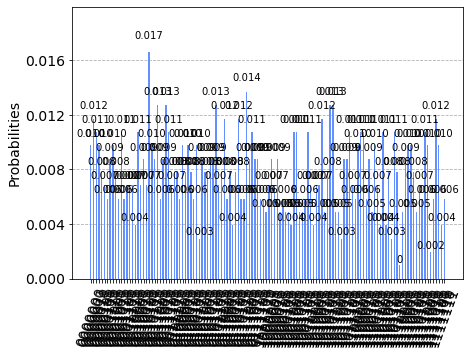

In [6]:
plot_histogram(counts)